In [21]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [53]:
# print("GPU Available:", tf.config.list_physical_devices('GPU'))

Load data

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
#building our data pipeline
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Authentify/data')

Found 2041 files belonging to 2 classes.


In [24]:
#allowing us to actually access our data pipeline
data_iterator = data.as_numpy_iterator()

In [25]:
#accessing data pipeline
batch = data_iterator.next() #images represented as numpy arrays
#batch[0] - images, batch[1] - labels

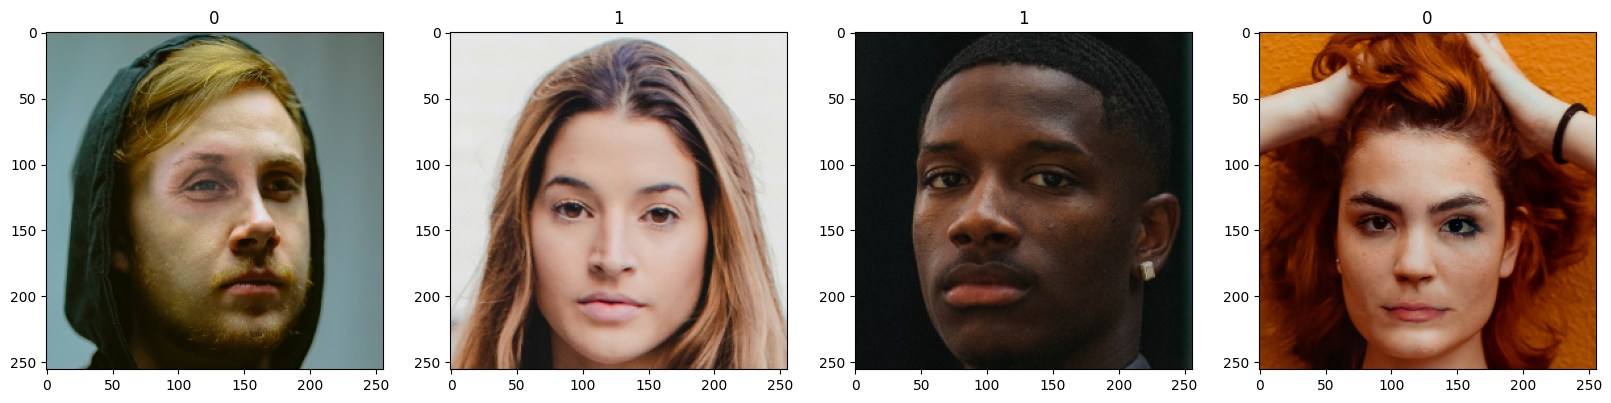

In [26]:
#To check which class is assigned which label
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale data

In [27]:
#while building a deep learning model we want values to be as small as possible, this will optimize and makes it faster
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[2.01708987e-01, 1.50728598e-01, 8.53486881e-02],
          [2.07781866e-01, 1.56801477e-01, 9.14215669e-02],
          [1.97025314e-01, 1.46044925e-01, 8.06650221e-02],
          ...,
          [2.27512255e-01, 1.62132353e-01, 9.93872583e-02],
          [2.30065674e-01, 1.64685771e-01, 1.01940677e-01],
          [2.20955878e-01, 1.55575976e-01, 9.28308815e-02]],
 
         [[2.15645105e-01, 1.64664716e-01, 9.79980454e-02],
          [2.15687230e-01, 1.64706841e-01, 9.80401710e-02],
          [2.09046602e-01, 1.58066213e-01, 9.13995504e-02],
          ...,
          [2.27389708e-01, 1.60723045e-01, 9.79779437e-02],
          [2.31189683e-01, 1.64523020e-01, 1.01777919e-01],
          [2.22262755e-01, 1.55596092e-01, 9.28509906e-02]],
 
         [[2.13174015e-01, 1.62193626e-01, 9.55269635e-02],
          [2.07982913e-01, 1.57002524e-01, 9.03358608e-02],
          [2.19807938e-01, 1.68827549e-01, 1.02160886e-01],
          ...,
          [2.26041660e-01, 1.59374997e-01, 9.6629

Split data

In [28]:
len(data)

64

In [29]:
#to avoid overfitting
train_size = int(0.7 * data.cardinality().numpy())  # 70% for training
val_size = int(0.2 * data.cardinality().numpy())   # 20% for validation
test_size = data.cardinality().numpy() - train_size - val_size  # Remaining for test

In [30]:
train_size+val_size+test_size

64

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build deep learning model

In [32]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [34]:
model = tf.keras.Sequential()

In [35]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) #first layers needs input
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
#adam is an adaptive learning rate optimization algorithm
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 16)       

Train

In [39]:
logdir='/content/drive/MyDrive/Authentify/logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 [==============================] - 136s 3s/step - loss: 0.7333 - accuracy: 0.5341 - val_loss: 0.6915 - val_accuracy: 0.5391
Epoch 2/20
44/44 [==============================] - 126s 3s/step - loss: 0.6893 - accuracy: 0.5440 - val_loss: 0.6667 - val_accuracy: 0.5859
Epoch 3/20
44/44 [==============================] - 132s 3s/step - loss: 0.6589 - accuracy: 0.6151 - val_loss: 0.6263 - val_accuracy: 0.6354
Epoch 4/20
44/44 [==============================] - 132s 3s/step - loss: 0.6085 - accuracy: 0.6705 - val_loss: 0.6160 - val_accuracy: 0.6589
Epoch 5/20
44/44 [==============================] - 133s 3s/step - loss: 0.5157 - accuracy: 0.7379 - val_loss: 0.6847 - val_accuracy: 0.6120
Epoch 6/20
44/44 [==============================] - 123s 3s/step - loss: 0.4209 - accuracy: 0.7962 - val_loss: 0.6717 - val_accuracy: 0.6562
Epoch 7/20
44/44 [==============================] - 123s 3s/step - loss: 0.3391 - accuracy: 0.8651 - val_loss: 0.8323 - val_accuracy: 0.6432
Epoch 8/20
44

Plot performance

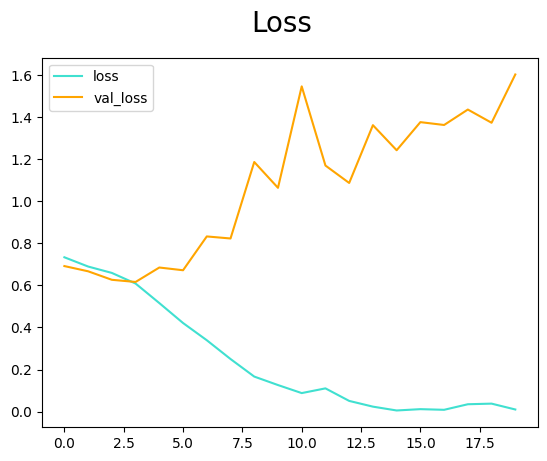

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='turquoise', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

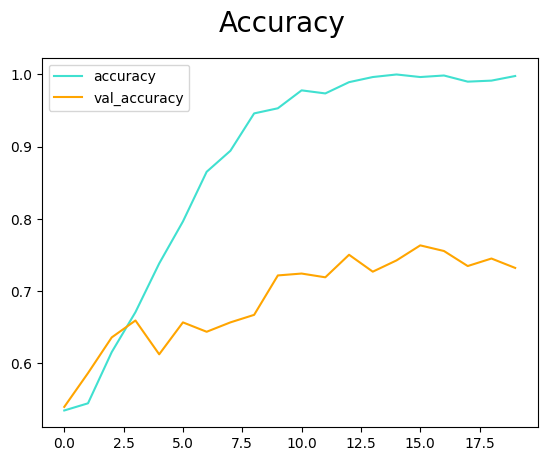

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='turquoise', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [45]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator():
    X, y = batch
    prediction = model.predict(X)
    precision.update_state(y, prediction)
    recall.update_state(y, prediction)
    accuracy.update_state(y, prediction)

1/1 [==============================] - 0s 421ms/step


In [47]:
print(precision.result(), recall.result(), accuracy.result())

tf.Tensor(0.719697, shape=(), dtype=float32) tf.Tensor(0.6785714, shape=(), dtype=float32) tf.Tensor(0.6706827, shape=(), dtype=float32)


Test

In [48]:
import cv2

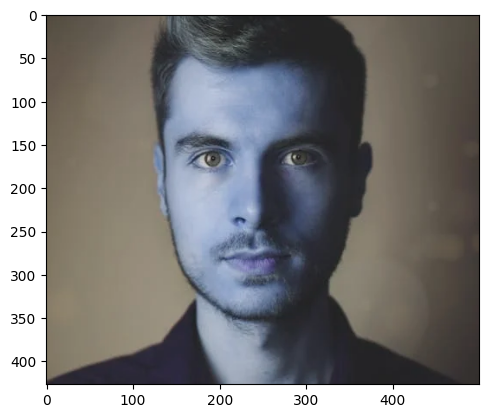

In [58]:
img = cv2.imread('/content/drive/MyDrive/Authentify/real_face.jpg')
plt.imshow(img)
plt.show()

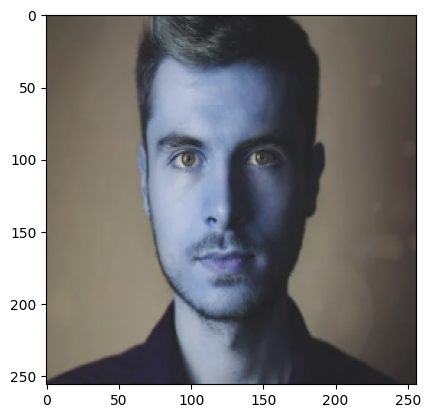

In [59]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
prediction = model.predict(np.expand_dims(resize/255, 0))
prediction

1/1 [==============================] - 0s 35ms/step


array([[0.9256929]], dtype=float32)

In [61]:
if prediction > 0.5:
    print(f'Predicted class is real')
else:
    print(f'Predicted class is fake')

Predicted class is real
